In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(f"E:\Data Science Material\EDA & Feature Engineering\data\playstore_missing_value_handled_data.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [3]:
df.shape

(10840, 13)

In [4]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [5]:
numerical_features = [col for col in df.columns if df[col].dtype != "O"]
categorical_features = [col for col in df.columns if df[col].dtype == "O"]

In [6]:
numerical_df = df[numerical_features]
categorical_df = df[categorical_features]

In [7]:
numerical_df.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19456.0,10000,0.0
1,3.9,967,14336.0,500000,0.0
2,4.7,87510,8908.8,5000000,0.0
3,4.5,215644,25600.0,50000000,0.0
4,4.3,967,2867.2,100000,0.0


In [8]:
categorical_df.head()

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### **Z-Score method**

**Function to create upper & lower limits**

In [9]:
def create_limits(df, column_name, q1, q3):
    Q1 = df[column_name].quantile(q1)
    Q3 = df[column_name].quantile(q3)

    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit 

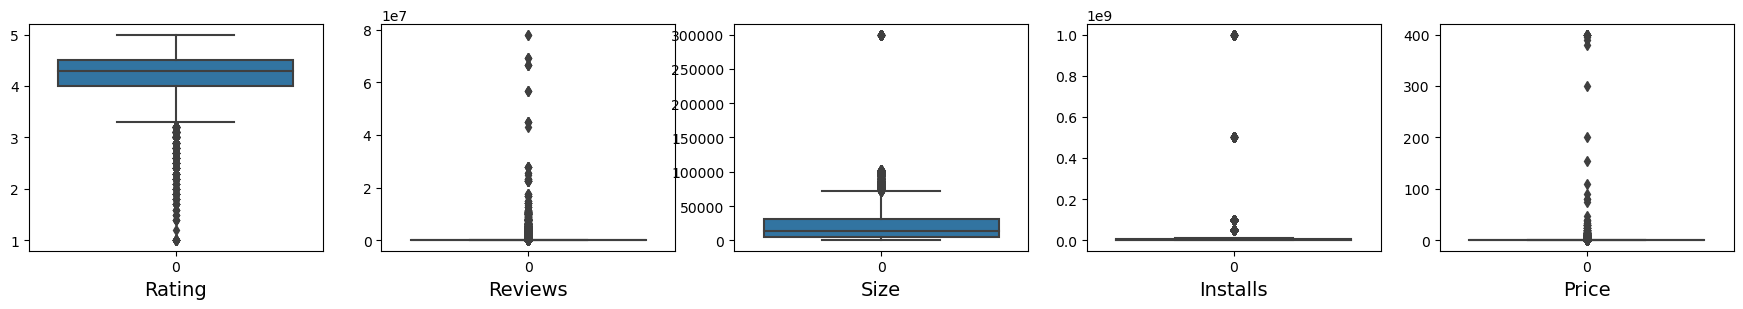

In [10]:
plt.figure(figsize=(22, 10))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(3, 5, i+1)
    sns.boxplot(numerical_df[col])
    plt.xlabel(col, fontsize = 14)

**Function to remove outliers beyond upper & lower limits**

In [11]:
def replace_outliers(df, numeric_columns):
    for var in numeric_columns:
        upper_limit, lower_limit = create_limits(df, var, 0.25, 0.75)
        df.loc[(df[var] > upper_limit), var] = upper_limit ## assigning the upper limit value to all the outliers
        df.loc[(df[var] < lower_limit), var] = lower_limit ## Assigning lower limit value to all lower outliers

In [12]:
replace_outliers(numerical_df, numerical_df.columns)

In [13]:
numerical_df.shape

(10840, 5)

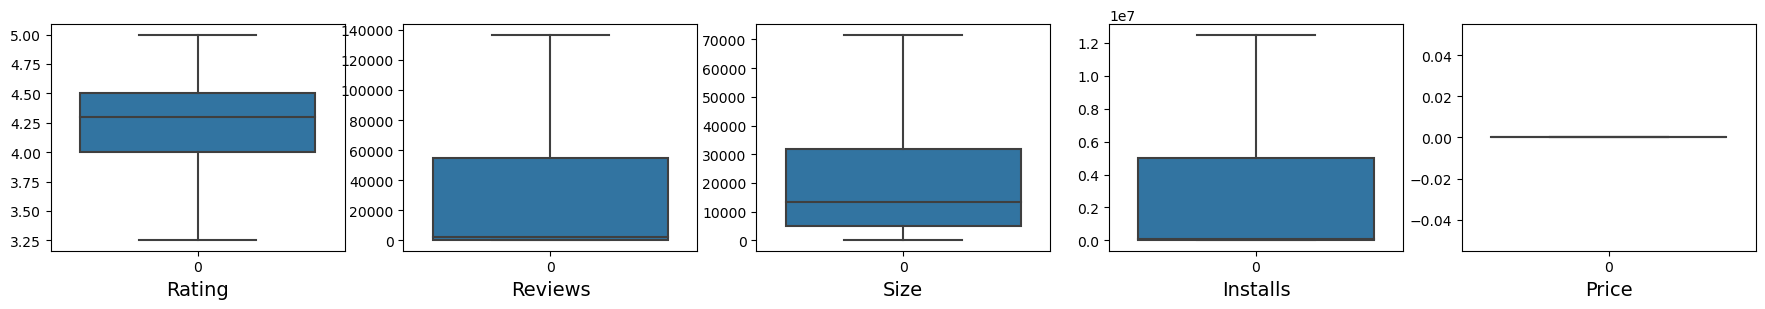

In [14]:
plt.figure(figsize=(22, 10))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(3, 5, i+1)
    sns.boxplot(numerical_df[col])
    plt.xlabel(col, fontsize = 14)

Now we have removed the outliers successfully by this method

### **Inter Quartile Range(IQR) Method**

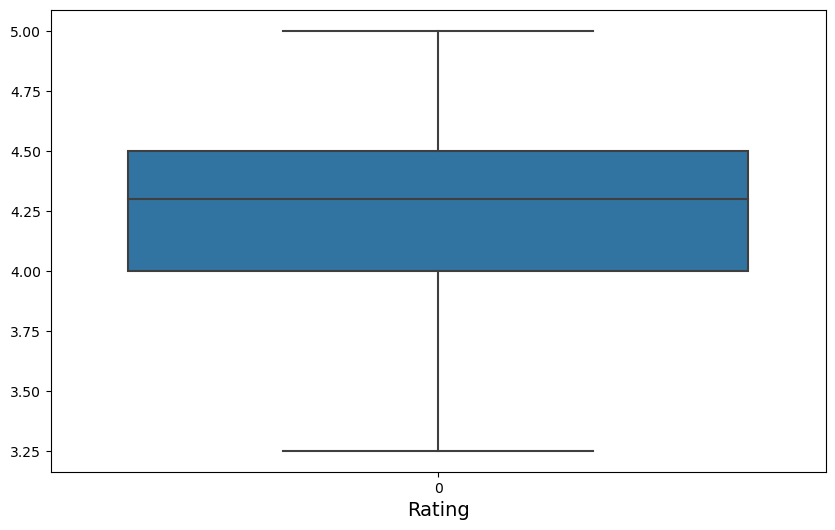

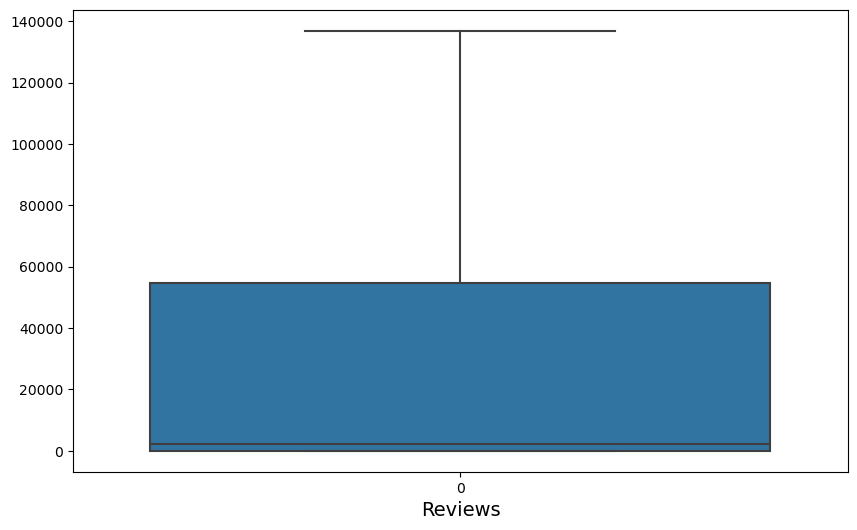

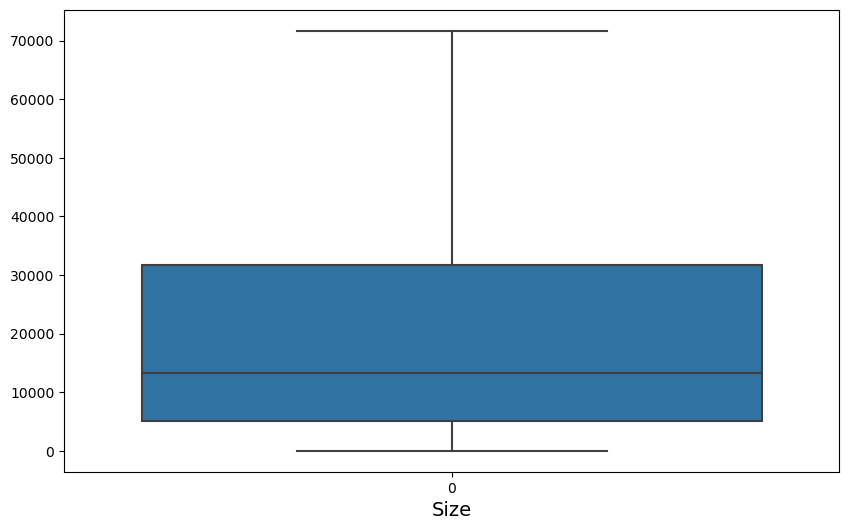

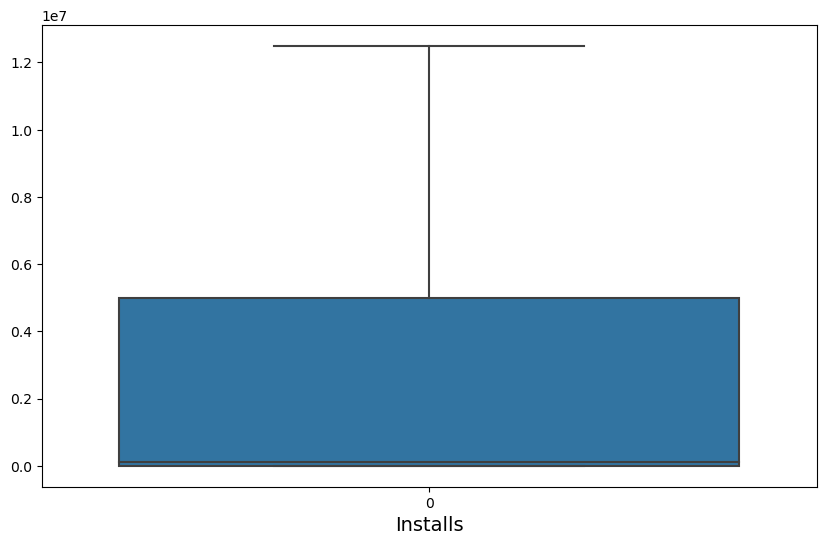

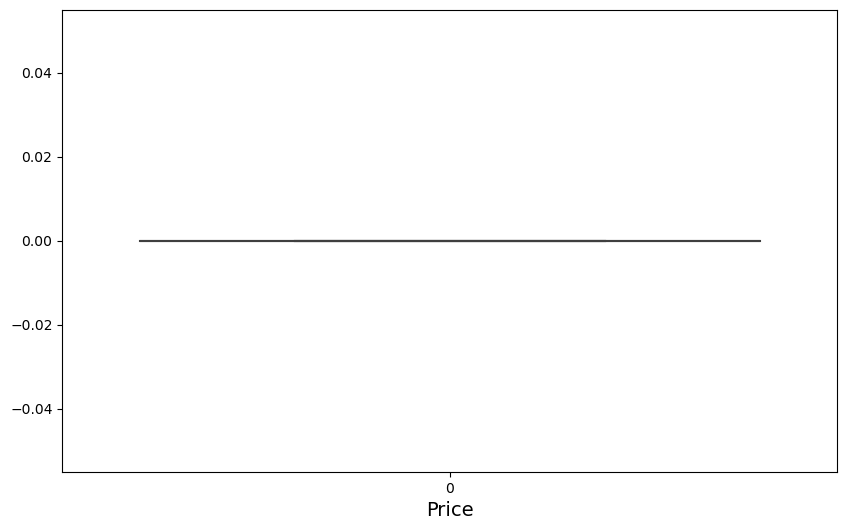

In [15]:
for col in numerical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(numerical_df[col])
    plt.xlabel(col, fontsize = 14)

In [16]:
df_IQR = df.copy()

In [17]:
df_IQR.shape

(10840, 13)

In [18]:
def remove_outliers_IQR(df, column):
    percentile_25 = df[column].quantile(0.25)
    percentile_75 = df[column].quantile(0.75)
    # print(f"25 percentile of column {column} is {percentile_25} & 75 percentile is {percentile_75}")

    IQR = percentile_75 - percentile_25
    upp_limit = percentile_75 + 1.5 * IQR
    low_limit = percentile_25 - 1.5 * IQR
    # print(f"Upper limit for column {column} is {upp_limit} & lower limit is {low_limit}")

    df[column] = np.where(df[column] > upp_limit, upp_limit, np.where(df[column] < low_limit, low_limit, df[column]))

    ## np.where(condition, if true X, else Y)
    # here in our code if df[column] > upp_limit then set there upp_limit value else again check same for lower limit,
    # if df[column] < low_limit, then assign low_limit else just return the df[column]

    # return df[df[column] > upp_limit]

In [19]:
numerical_features_IQR = [col for col in df_IQR.columns if df_IQR[col].dtype != "O"]
categorical_features_IQR = [col for col in df_IQR.columns if df_IQR[col].dtype == "O"]

numerical_df_IQR = df_IQR[numerical_features_IQR]
categorical_df_IQR = df_IQR[categorical_features_IQR]

In [20]:
remove_outliers_IQR(numerical_df_IQR, numerical_df_IQR.columns)

In [21]:
def create_comparison_graphs(df, df1, df2, column):

    plt.figure(figsize=(25, 15))
    plt.subplot(3,2,1)
    sns.distplot(df[column])
    plt.xlabel("Size distribution before removing outliers", fontsize = 16)

    plt.subplot(3,2,2)
    sns.boxplot(df[column])
    plt.xlabel("Size boxplot before removing outliers", fontsize = 16)

    plt.subplot(3,2,3)
    sns.distplot(df1[column])
    plt.xlabel("Size distribution after removing outliers IQR", fontsize = 16)

    plt.subplot(3,2,4)
    sns.boxplot(df1[column])
    plt.xlabel("Size boxplot after removing outliers IQR", fontsize = 16)

    plt.subplot(3,2,5)
    sns.distplot(df2[column])
    plt.xlabel("Size distribution after removing outliers Z-Score", fontsize = 16)

    plt.subplot(3,2,6)
    sns.boxplot(df2[column])
    plt.xlabel("Size boxplot after removing outliers Z-Score", fontsize = 16)

    plt.show()

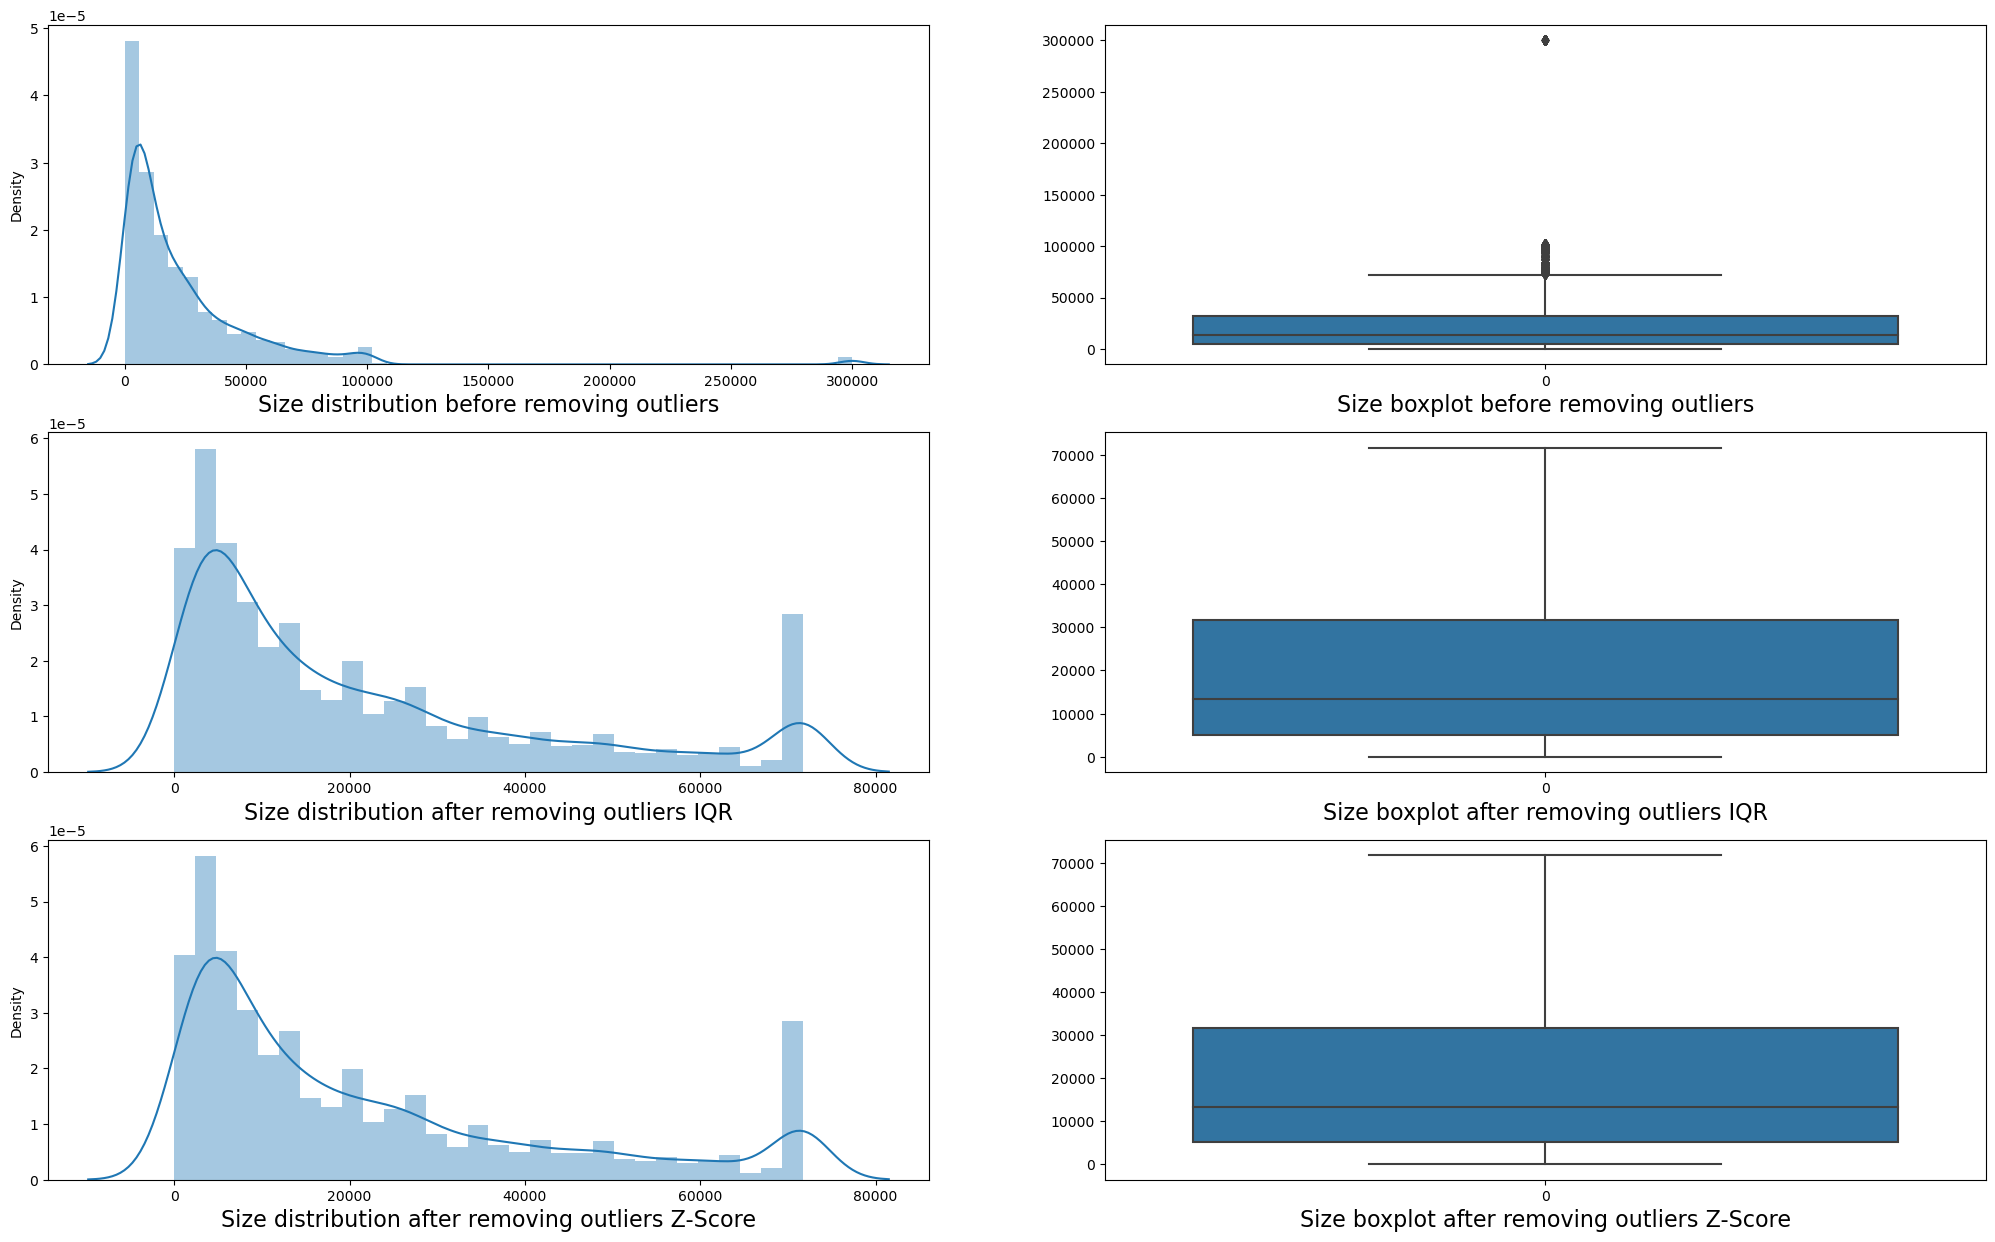

In [22]:
create_comparison_graphs(df, numerical_df_IQR, numerical_df, "Size")

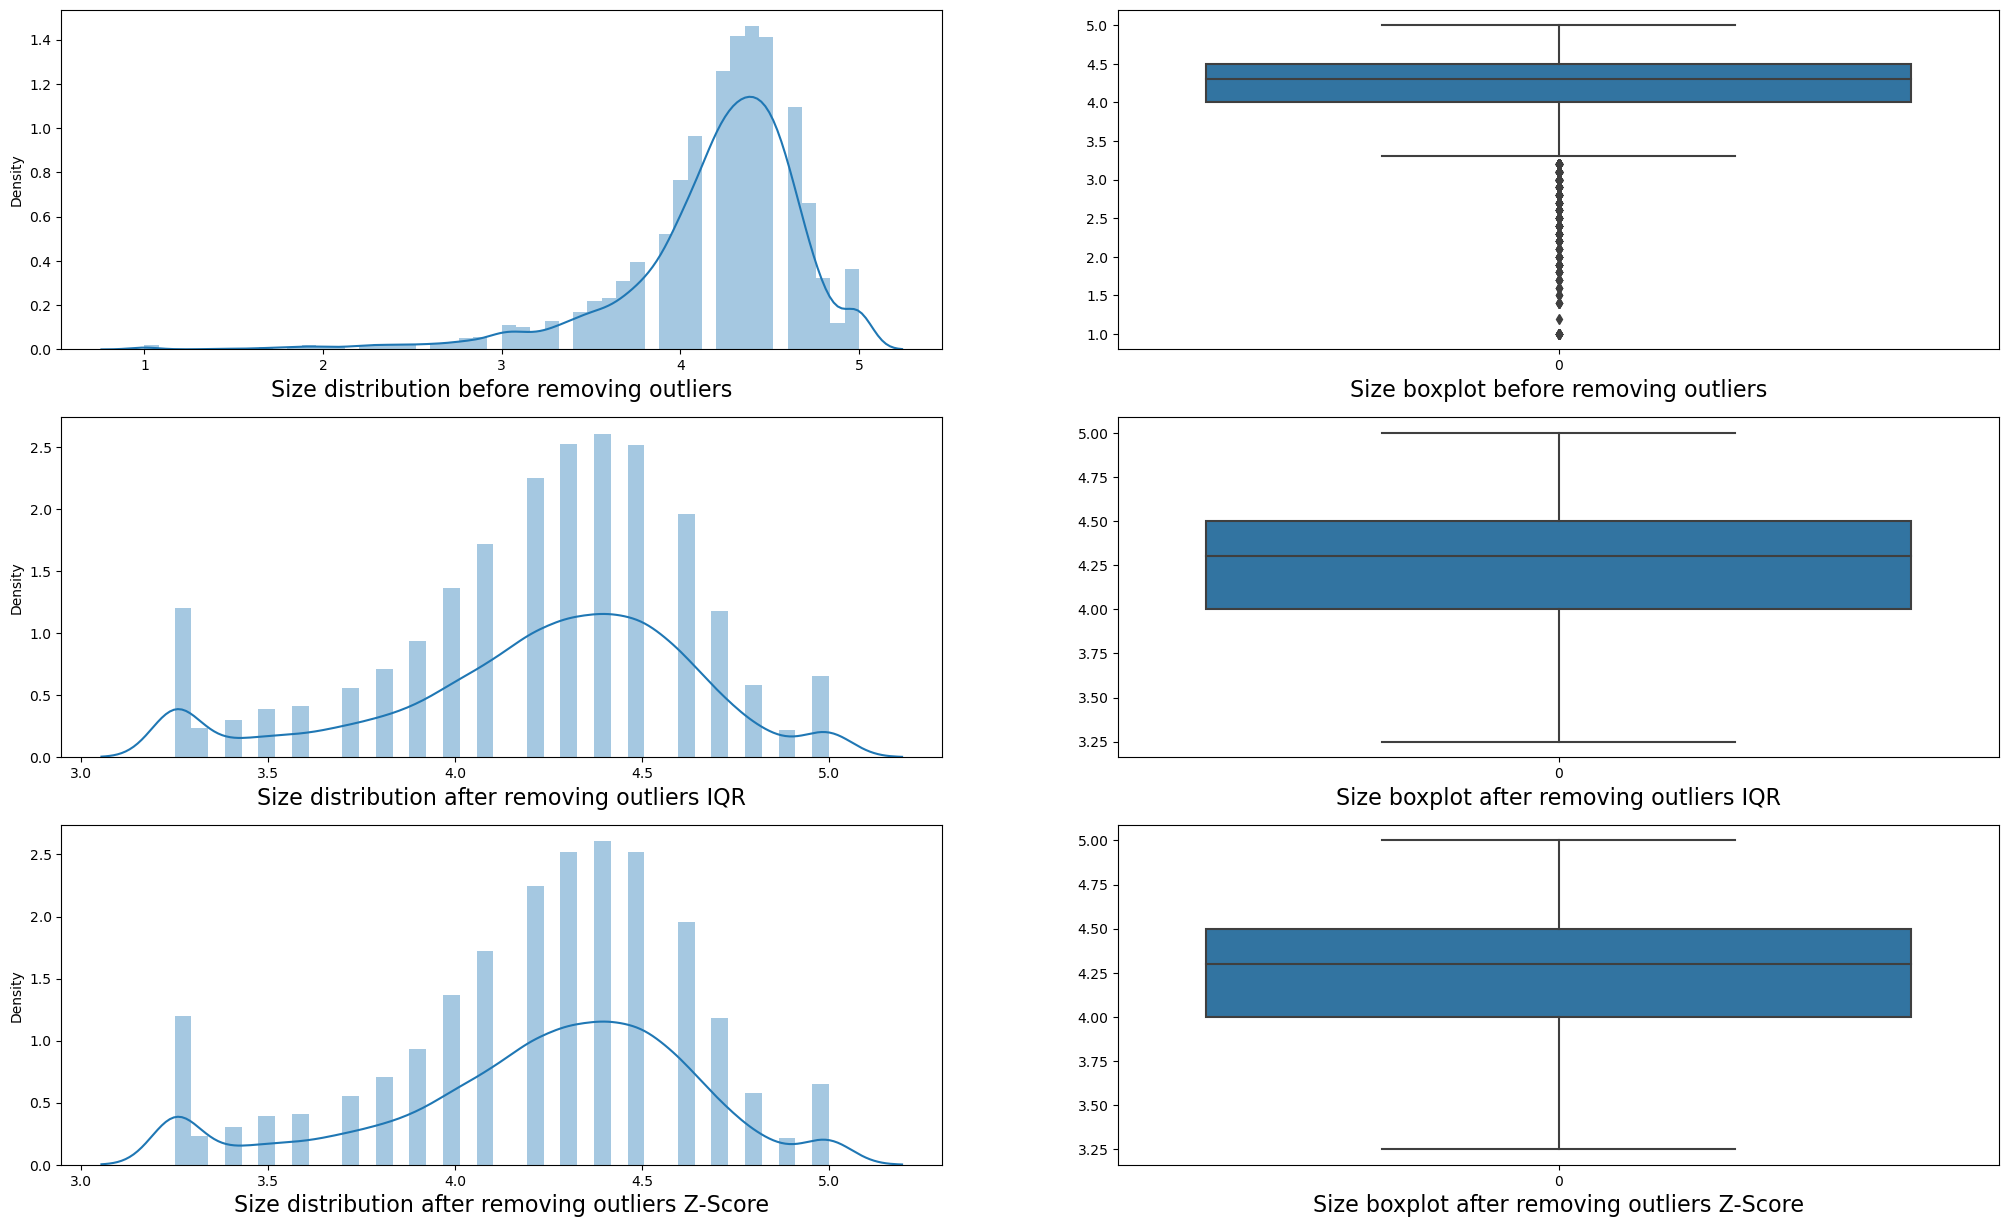

In [23]:
create_comparison_graphs(df, numerical_df_IQR, numerical_df, "Rating")

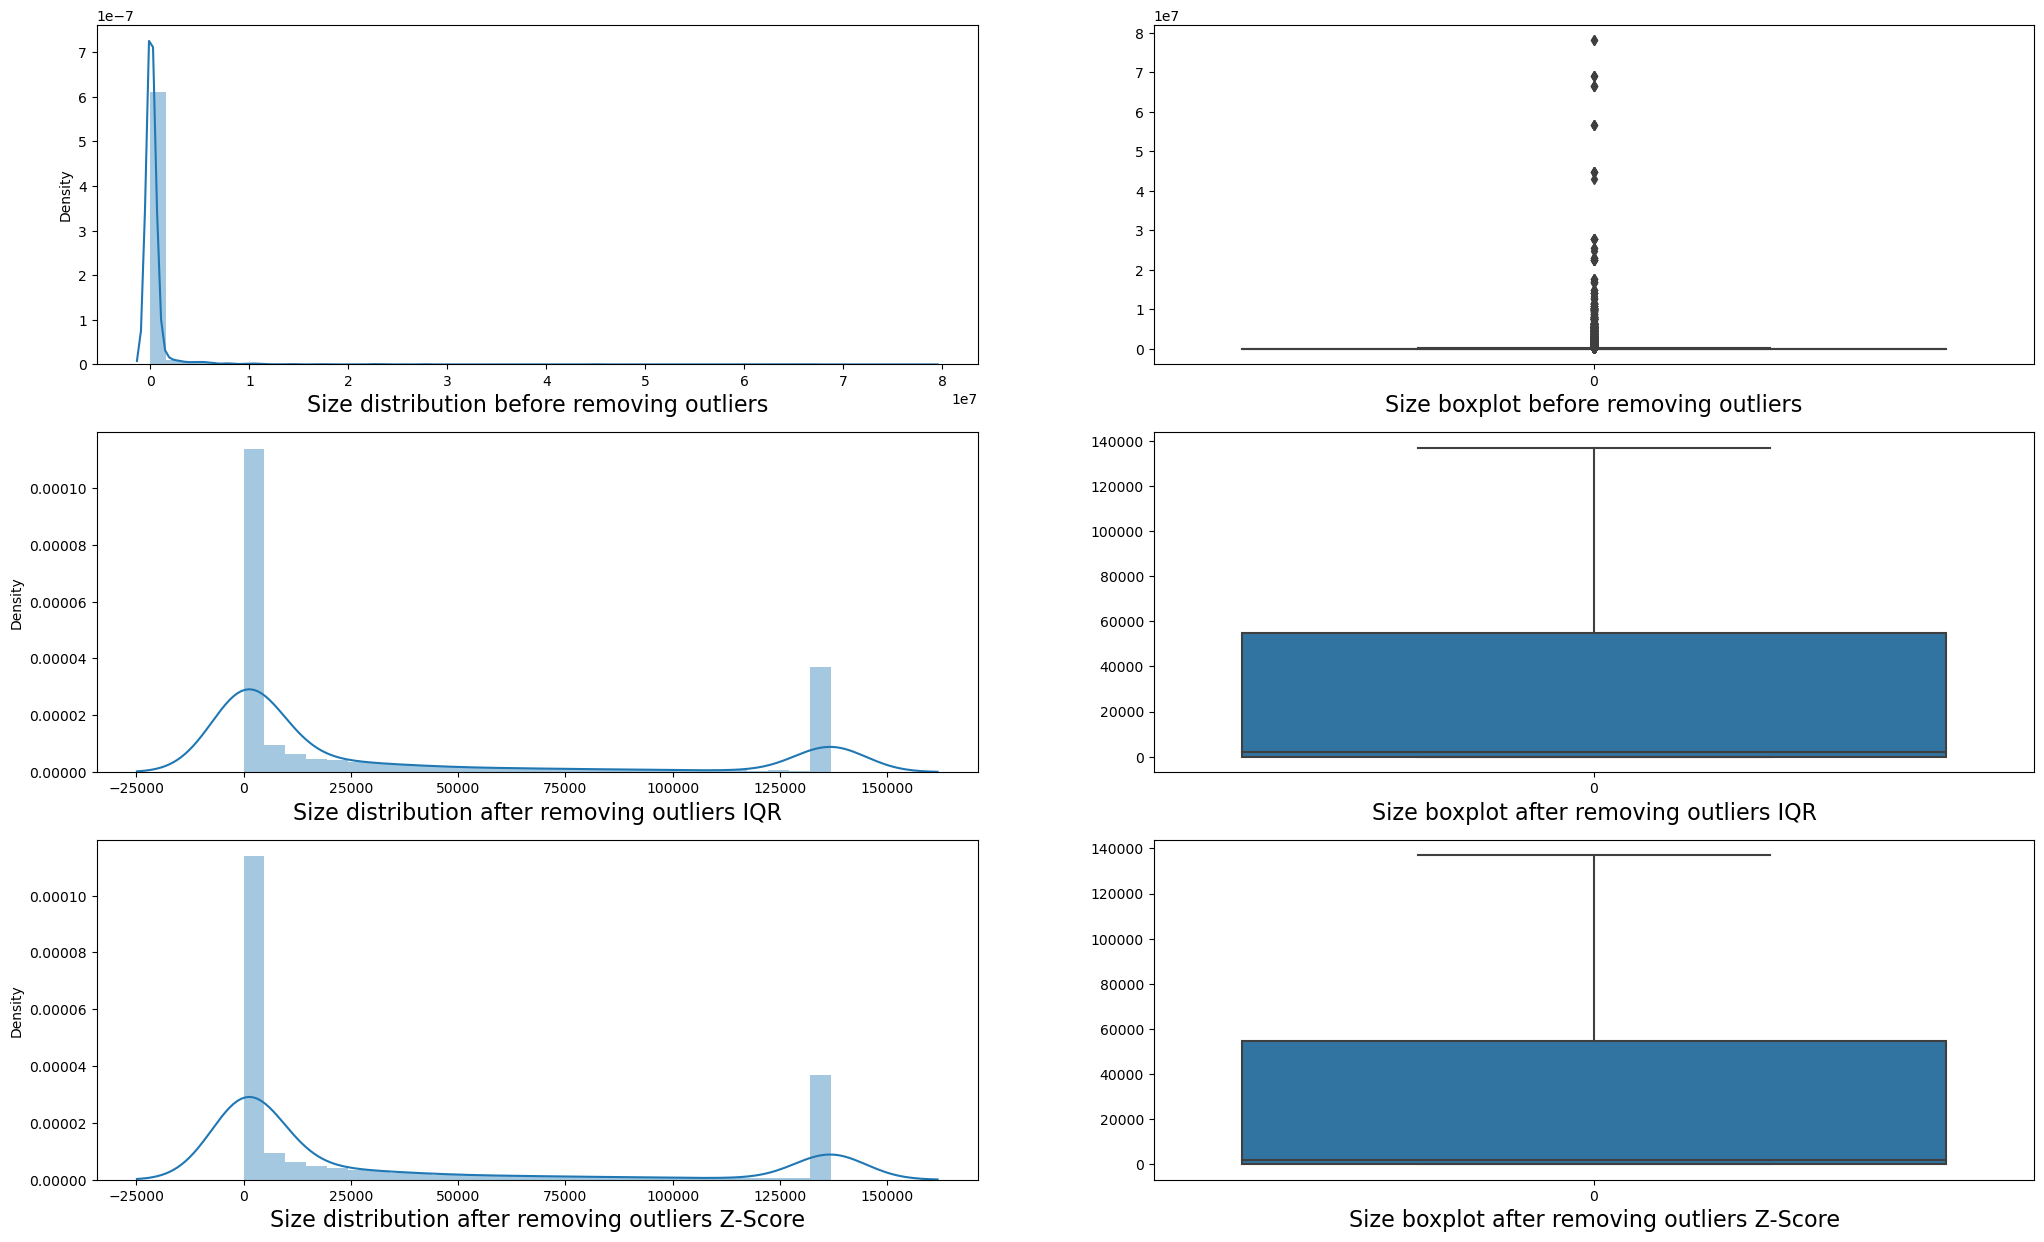

In [24]:
create_comparison_graphs(df, numerical_df_IQR, numerical_df, "Reviews")

In [25]:
numerical_df_IQR.shape, categorical_df_IQR.shape

((10840, 5), (10840, 8))

In [30]:
final_df = pd.concat([numerical_df_IQR, categorical_df_IQR], axis=1)

In [31]:
final_df.to_csv("./data/outlier_handled_playstore_data.csv", index=False)